In [46]:
import matplotlib
import seaborn as sns
import datetime
import pandas as pd
import json as js

%matplotlib inline
sns.set()

In [4]:
!cat ../data/655/*.jsonl > /tmp/655.jsonl

In [5]:
df = pd.read_json("/tmp/655.jsonl", lines=True)

In [7]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df['numbers'].explode()

In [41]:
# check if number of previous days appear in current day
def check_prev(data: pd.DataFrame, look_back=7):
    out_data = []
    for row in data.itertuples():
        look_back_date = row.date - datetime.timedelta(days=look_back)
        window_data = data[
            (data['date'] >= look_back_date) & (data['date'] < row.date)]
        intersect_numbers = []
        intersect_days = []
        for lb_row in window_data.itertuples():
            look_backs_result = set(lb_row.result)
            result = set(row.result)
            intersect = look_backs_result.intersection(result)
            if len(intersect) > 0:
                intersect_numbers += list(intersect)
                intersect_days.append(lb_row.date)
        out_data.append({
            'date': row.date,
            'result': row.result,
            'intersect_numbers_n': len(intersect_numbers),
            'intersect_numbers': intersect_numbers,
            'intersect_days_n': len(intersect_days),
            'intersect_days': intersect_days,
        })
    return pd.DataFrame(out_data)

In [42]:
lb_range = [7, 10, 14, 21, 30]
dffs = {}
for lb in lb_range:
    df_lb = check_prev(df, lb)
    print("")
    print(lb)
    dff = df_lb[df_lb['intersect_days_n'] > 0]
    dffs[lb] = dff
    print(len(dff) / len(df))
    print(dff.describe())


7
0.8599221789883269
       intersect_numbers_n  intersect_days_n
count           442.000000        442.000000
mean              2.794118          1.929864
std               1.480229          0.806473
min               1.000000          1.000000
25%               2.000000          1.000000
50%               3.000000          2.000000
75%               4.000000          2.000000
max               8.000000          5.000000

10
0.943579766536965
       intersect_numbers_n  intersect_days_n
count           485.000000        485.000000
mean              3.569072          2.498969
std               1.800445          1.053575
min               1.000000          1.000000
25%               2.000000          2.000000
50%               3.000000          2.000000
75%               5.000000          3.000000
max              10.000000          6.000000

14
0.9708171206225681
       intersect_numbers_n  intersect_days_n
count           499.000000        499.000000
mean              4.889780       

In [53]:
dffs[7].query('intersect_days_n == 4')

,date,result,intersect_numbers_n,intersect_numbers,intersect_days_n,intersect_days
136,2018-06-16,"[14, 15, 21, 30, 44, 47, 48]",6,"[48, 15, 21, 15, 48, 47]",4,"[2018-06-14 00:00:00, 2018-06-09 00:00:00, 201..."
251,2019-03-14,"[18, 21, 25, 35, 44, 53, 4]",7,"[25, 4, 25, 35, 4, 44, 21]",4,"[2019-03-08 00:00:00, 2019-03-09 00:00:00, 201..."
277,2019-05-14,"[6, 11, 15, 21, 30, 40, 10]",7,"[21, 30, 10, 30, 6, 40, 11]",4,"[2019-05-09 00:00:00, 2019-05-10 00:00:00, 201..."
424,2020-05-16,"[19, 35, 38, 49, 52, 55, 1]",5,"[55, 19, 1, 52, 38]",4,"[2020-05-14 00:00:00, 2020-05-09 00:00:00, 202..."
488,2020-10-15,"[8, 38, 41, 47, 50, 52, 45]",7,"[50, 52, 45, 50, 47, 52, 45]",4,"[2020-10-09 00:00:00, 2020-10-10 00:00:00, 202..."
489,2020-10-17,"[3, 14, 25, 37, 49, 54, 53]",6,"[53, 54, 53, 53, 3, 54]",4,"[2020-10-10 00:00:00, 2020-10-13 00:00:00, 202..."


<AxesSubplot:>

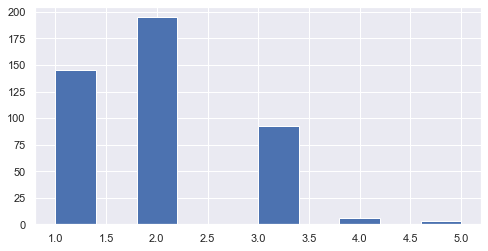

In [49]:
dffs[7]['intersect_days_n'].hist(figsize=(8, 4))

<AxesSubplot:>

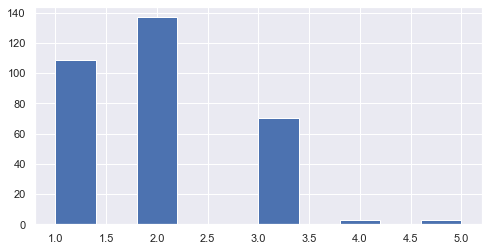

In [51]:
d = dffs[7]
d[d['date'] < datetime.datetime(2020, 1, 1)]['intersect_days_n'].hist(figsize=(8, 4))

<AxesSubplot:>

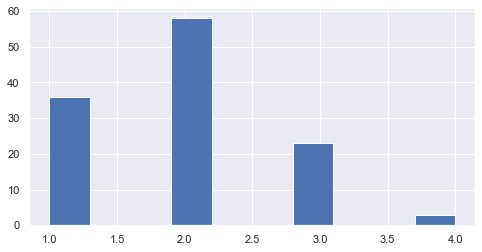

In [52]:
d = dffs[7]
d[d['date'] >= datetime.datetime(2020, 1, 1)]['intersect_days_n'].hist(figsize=(8, 4))